In [5]:
# %% [Install required packages]
%pip install qiskit-ibm-runtime
%pip install qiskit_aer
%pip install qiskit
%pip install matplotlib

# %% [Imports]
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:

# %% [Save IBM Quantum account credentials]
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="0a36966977a20de04e025a331253d45c66f8f0139cbb352cb382c5cfee983a61ee15dc87df60f9d918d753e8009d52b1270f6e67f04e3ee4a09165246759aac1",
    set_as_default=True,
    overwrite=True
)

QASM Simulator Result (Counts): {'1': 1024}


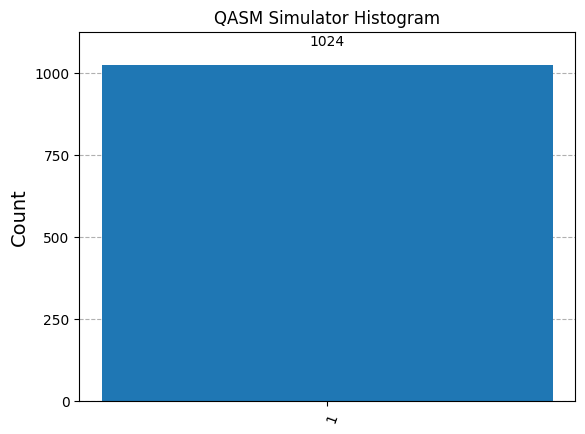

In [10]:
# %% [Create the quantum circuit]
circuit = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit
circuit.x(0)                    # Apply X gate to flip qubit to |1⟩
circuit.measure(0, 0)           # Measure qubit 0 into classical bit 0

# %% [Simulate using QASM]
simulator = AerSimulator(method='automatic')  # Use AerSimulator with QASM
sim_job = simulator.run(circuit, shots=1024)  # Run with 1024 shots
sim_result = sim_job.result()
sim_counts = sim_result.get_counts()

# Show simulation result
print("QASM Simulator Result (Counts):", sim_counts)

# Plot histogram for simulation
plot_histogram(sim_counts, title="QASM Simulator Histogram")
plt.show()  # Ensure the plot displays

# Plot histogram for simulation using Qiskit's plot_histogram
plot_histogram(sim_counts, title="QASM Simulator Histogram")  # No .show() needed with %matplotlib inline

IBM Job ID: cyv9bkejj6dg008g5en0
IBM Brisbane Result: PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-02-20 02:39:57', stop='2025-02-20 02:39:59', size=4096>)])}, 'version': 2})
IBM Brisbane Counts: {'1': 4005, '0': 91}


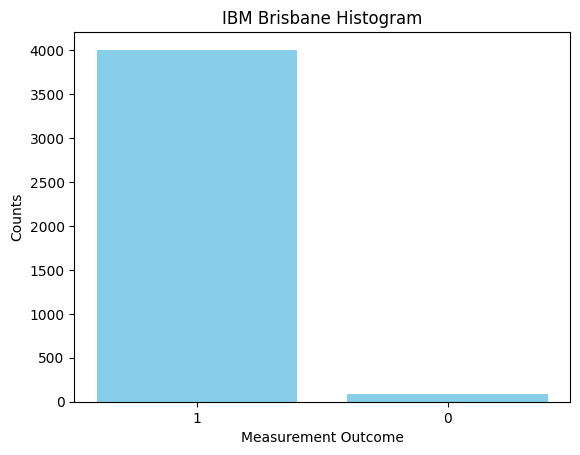

In [8]:
# %% [Run on IBM hardware]
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
ibm_job = Sampler(backend).run([circuit])  # Run on IBM Brisbane

# Show job ID and wait for result
print(f"IBM Job ID: {ibm_job.job_id()}")
ibm_result = ibm_job.result()
print("IBM Brisbane Result:", ibm_result)

# Extract and process IBM result for histogram
bit_array = ibm_result[0].data.c  # Access the measurement data
try:
    ibm_counts = bit_array.get_counts()  # Try built-in method
except AttributeError:
    # Manual counting if get_counts() is unavailable
    ibm_counts = {'0': 0, '1': 0}
    for shot in bit_array.array:
        outcome = str(shot)
        ibm_counts[outcome] = ibm_counts.get(outcome, 0) + 1

# Show IBM counts
print("IBM Brisbane Counts:", ibm_counts)

# Plot histogram for IBM result using Matplotlib
states = list(ibm_counts.keys())
values = list(ibm_counts.values())
plt.bar(states, values, color='skyblue')
plt.xlabel('Measurement Outcome')
plt.ylabel('Counts')
plt.title('IBM Brisbane Histogram')
plt.show()

# %%